# 공공데이터 식당 영업점 데이터 분석 및 가공

[공공데이터 - 서울시 일반음식점 인허가 정보](https://data.seoul.go.kr/dataList/OA-16094/S/1/datasetView.do)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
from matplotlib import rc

# macOS에서는 'AppleGothic'을 기본 폰트로 설정
rc('font', family='AppleGothic')

# 유니코드 마이너스 기호 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv("./public_data.csv", encoding="EUC-KR", encoding_errors="ignore", low_memory=False)

In [4]:
df.shape

(517860, 44)

In [5]:
df.columns

Index(['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적',
       '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분',
       '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '위생업태명', '남성종사자수', '여성종사자수',
       '영업장주변구분명', '등급구분명', '급수시설구분명', '총인원', '본사종업원수', '공장사무직종업원수',
       '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모',
       '전통업소지정번호', '전통업소주된음식', '홈페이지'],
      dtype='object')

## 영업 상태 정보 (폐업 / 영업 중)

In [6]:
df["영업상태명"].value_counts()

영업상태명
폐업       394604
영업/정상    123256
Name: count, dtype: int64

In [7]:
df = df[df["영업상태명"] != "폐업"]
df["영업상태명"].value_counts()

영업상태명
영업/정상    123256
Name: count, dtype: int64

## 지역, 위치 정보

In [8]:
seoul_district_map = {
    3000000: "종로구",
    3010000: "중구",
    3020000: "용산구",
    3030000: "성동구",
    3040000: "광진구",
    3050000: "동대문구",
    3060000: "중랑구",
    3070000: "성북구",
    3080000: "강북구",
    3090000: "도봉구",
    3100000: "노원구",
    3110000: "은평구",
    3120000: "서대문구",
    3130000: "마포구",
    3140000: "양천구",
    3150000: "강서구",
    3160000: "구로구",
    3170000: "금천구",
    3180000: "영등포구",
    3190000: "동작구",
    3200000: "관악구",
    3210000: "서초구",
    3220000: "강남구",
    3230000: "송파구",
    3240000: "강동구"
}

### 개방자치단체(구) 별 식당 분포

In [9]:
df['개방자치단체코드_지역'] = df['개방자치단체코드'].map(seoul_district_map)

In [10]:
df['개방자치단체코드_지역'].value_counts()

개방자치단체코드_지역
강남구     12549
마포구      8222
송파구      7286
영등포구     6911
종로구      6605
중구       6145
서초구      5631
강서구      5623
용산구      5164
관악구      4855
광진구      4276
구로구      4050
성북구      4031
성동구      3980
강동구      3967
동대문구     3966
은평구      3852
중랑구      3798
노원구      3734
서대문구     3545
강북구      3330
동작구      3231
금천구      3145
양천구      3077
도봉구      2283
Name: count, dtype: int64

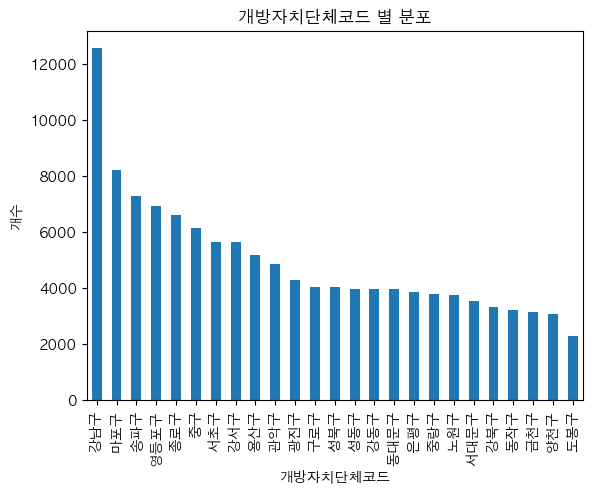

In [11]:
개방자치단체코드_지역_value_counts = df['개방자치단체코드_지역'].value_counts()

개방자치단체코드_지역_value_counts.plot(kind='bar')
plt.title('개방자치단체코드 별 분포')
plt.xlabel('개방자치단체코드')
plt.ylabel('개수')
plt.show()

### 좌표정보 없는 식당 정보

In [12]:
df[df["좌표정보(X)"].isna()].shape, df[df["좌표정보(Y)"].isna()].shape

((1562, 45), (1562, 45))

In [13]:
df = df[df["좌표정보(X)"].isna() == False]

## 식당 분류 정보정보

In [14]:
df['업태구분명'].value_counts()

업태구분명
한식                 52018
기타                 20748
호프/통닭               9225
경양식                 8888
분식                  7916
일식                  6711
중국식                 4773
외국음식전문점(인도,태국등)     1908
통닭(치킨)              1851
정종/대포집/소주방          1783
까페                  1453
식육(숯불구이)            1109
횟집                   547
김밥(도시락)              520
패스트푸드                518
뷔페식                  442
감성주점                 343
패밀리레스트랑              199
라이브카페                198
냉면집                  179
탕류(보신용)              131
출장조리                  99
복어취급                  49
전통찻집                  40
키즈카페                  37
이동조리                   3
커피숍                    2
Name: count, dtype: int64

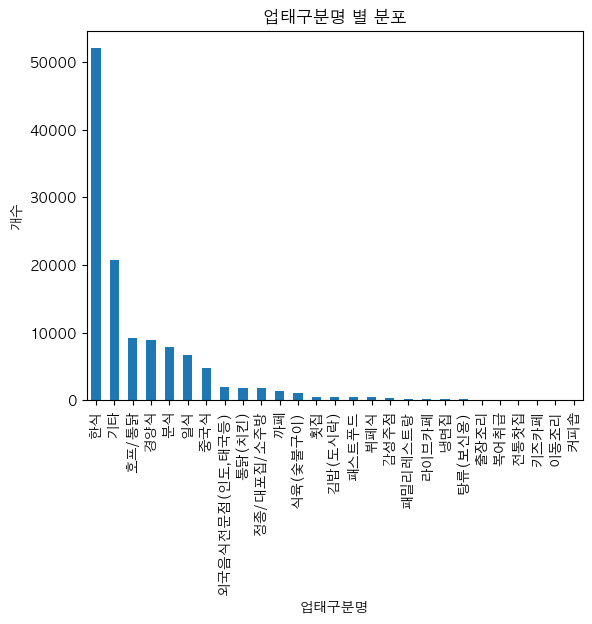

In [15]:
업태구분명_value_counts = df['업태구분명'].value_counts()

업태구분명_value_counts.plot(kind='bar')
plt.title('업태구분명 별 분포')
plt.xlabel('업태구분명')
plt.ylabel('개수')
plt.show()

## 지역별 업태 분류

<Axes: xlabel='업태구분명', ylabel='개방자치단체코드_지역'>

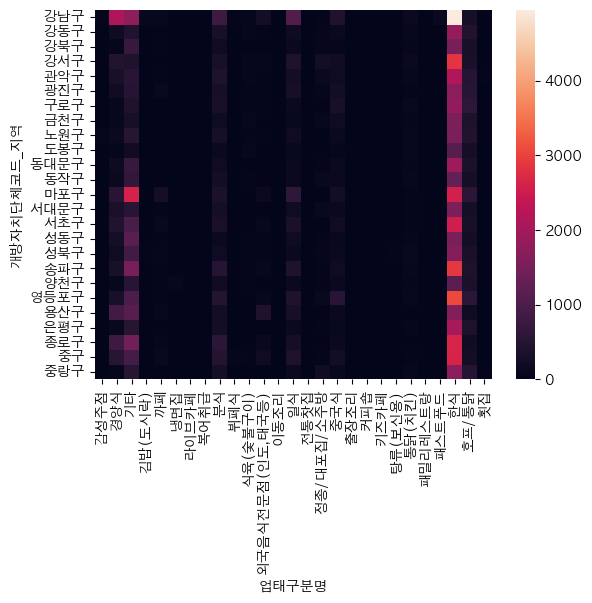

In [16]:
df_grouped = df.groupby(['개방자치단체코드_지역', '업태구분명']).size().reset_index(name='count')
sns_df = pd.pivot_table(df_grouped, index='개방자치단체코드_지역', columns='업태구분명', values='count', fill_value = 0)
sns.heatmap(sns_df)

<Axes: xlabel='업태구분명', ylabel='개방자치단체코드_지역'>

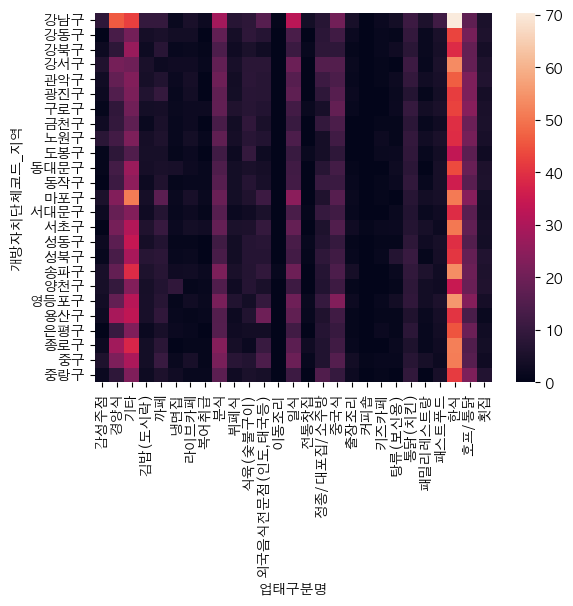

In [21]:
df_grouped = df.groupby(['개방자치단체코드_지역', '업태구분명']).size().reset_index(name='count')
df_grouped["sqrt(count)"] = df_grouped[["count"]] ** 0.5

sns_df = pd.pivot_table(df_grouped, index='개방자치단체코드_지역', columns='업태구분명', values='sqrt(count)', fill_value = 0)
sns.heatmap(sns_df)